# Color Image Quantization
Reduce the number of colors in images (`lena.png`, `peppers.tif`) to 16 using K-means clustering, implemented from scratch. Log L2 norms per iteration and optionally visualize quantized images.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import matplotlib.pyplot as plt


def kmeans_quantization(image, k=16, max_iterations=100, visualize=False, tol=1e-4):
    """Perform K-means color quantization on an image.
    
    Args:
        image: Input image (H, W, 3) as float32 in [0, 1].
        k: Number of clusters (colors).
        max_iterations: Maximum number of iterations.
        visualize: If True, display quantized image per iteration.
        tol: Threshold for convergence.
    
    Returns:
        quantized_image: Image with k colors.
        l2_norms: List of L2 norms per iteration.
    """
    # 1. Reshape image to list of pixels (N, 3)
    h, w, c = image.shape
    pixels = image.reshape(-1, 3)

    # 2. Initialize k centroids randomly
    np.random.seed(42)  # reproducibility
    indices = np.random.choice(len(pixels), k, replace=False)
    centroids = pixels[indices]

    l2_norms = []
    prev_error = float("inf")

    for it in range(max_iterations):
        # 3. Assign pixels to nearest centroid (L2 norm)
        distances = np.linalg.norm(pixels[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)

        # 4. Update centroids as mean of assigned pixels
        new_centroids = np.array([
            pixels[labels == j].mean(axis=0) if np.any(labels == j) else centroids[j]
            for j in range(k)
        ])

        # 5. Compute L2 norm between old and new centroids (convergence check)
        error = np.linalg.norm(centroids - new_centroids)
        l2_norms.append(error)

        centroids = new_centroids

        if visualize:
            quantized = centroids[labels].reshape(h, w, c)
            plt.imshow(quantized)
            plt.title(f"Iteration {it+1}, L2={error:.4f}")
            plt.axis("off")
            plt.show()

        if abs(prev_error - error) < tol:
            print(f"Converged at iteration {it+1}")
            break
        prev_error = error

    # 6. Reconstruct quantized image
    quantized_image = centroids[labels].reshape(h, w, c)

    return quantized_image, l2_norms


In [3]:
def calculate_l2_norm(original, quantized):
    """Calculate total L2 norm between original and quantized images.
    
    Args:
        original: Original image (H, W, 3) as float32 in [0, 1].
        quantized: Quantized image (H, W, 3) as float32 in [0, 1].
    
    Returns:
        l2_norm: Total L2 norm across all pixels.
    """
  
    diff = original - quantized              
    squared = np.sum(diff ** 2, axis=2)       # (R1-R2)^2 + (G1-G2)^2 + (B1-B2)^2
    total_l2 = np.sqrt(np.sum(squared))      
    return total_l2
    

In [ ]:
# Load images
lena_path = './images_CIQ/lena.png'
#'./images_CIQ/lena.png'
lena = cv2.imread(lena_path).astype(np.float32) / 255.0

# Parameters
k = 16
max_iterations = 100
visualize = False
#if you want to see each iteration change it to  True

Converged at iteration 23


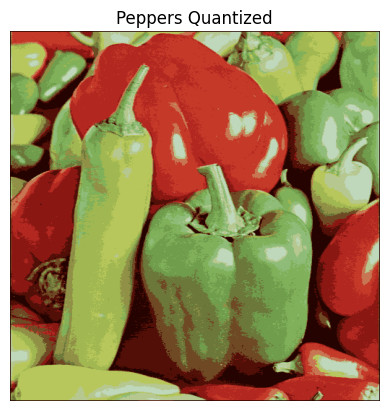

Total L2 Norm (Peppers): 39.17


True

In [ ]:
#this is for peppers

# Load peppers image
peppers_path ='./images_CIQ/peppers.tiff'
peppers = cv2.imread(peppers_path).astype(np.float32) / 255.0

# Process peppers
peppers_quantized, peppers_l2_norms = kmeans_quantization(peppers, k, max_iterations, visualize)

# Save L2 norms for peppers
with open('peppers_L2_norm_log.txt', 'w') as f:
    f.write('Peppers L2 Norms:\n' + '\n'.join(map(str, peppers_l2_norms)) + '\n')

# Calculate final L2 norms for peppers
peppers_l2 = calculate_l2_norm(peppers, peppers_quantized)

# Visualize results
plt.imshow(cv2.cvtColor(peppers_quantized, cv2.COLOR_BGR2RGB))
plt.title('Peppers Quantized')
plt.axis('off')
plt.show()

print(f'Total L2 Norm (Peppers): {peppers_l2:.2f}')

# Save quantized peppers image
cv2.imwrite('peppers_quantized.png', (peppers_quantized * 255).astype(np.uint8))

Converged at iteration 20


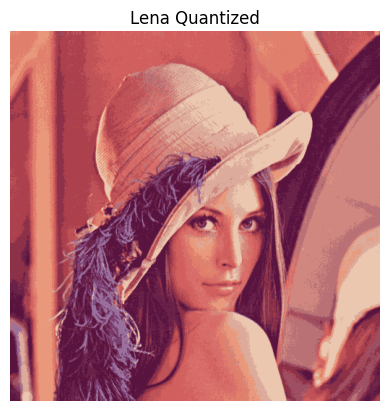

Total L2 Norm: 29.86


True

In [6]:
#this is for lena

# Process images
lena_quantized, lena_l2_norms = kmeans_quantization(lena, k, max_iterations, visualize)

# Save L2 norms
with open('L2_norm_log.txt', 'w') as f:
    f.write('Lena L2 Norms:\n' + '\n'.join(map(str, lena_l2_norms)) + '\n')

# Calculate final L2 norms
lena_l2 = calculate_l2_norm(lena, lena_quantized)

# Visualize results
plt.imshow(cv2.cvtColor(lena_quantized, cv2.COLOR_BGR2RGB))
plt.title('Lena Quantized')
plt.axis('off')
plt.show()

print(f'Total L2 Norm: {lena_l2:.2f}')

# Save quantized images
cv2.imwrite('lena_quantized.png', (lena_quantized * 255).astype(np.uint8))